# <center>  **Data Wrangling** 

### <center> **Data Collection**

Goal: Organize your data to streamline the next steps of your capstone

Time estimate: 1-2 hours

<center> Data Loading

Importing Packages

In [18]:
# Import all the Necessary Packages
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.style.use('dark_background')

Importing the data

In [4]:
# Import the data and see what it looks like
path = r'C:\Users\jdrel\OneDrive\Documents\Data_Science\Springboard\Capstone-2\data\raw\kddcup.data_10_percent'
data = pd.read_csv(path)

### <center> **Data Definition**

<center> Column Names

The column names can be found in the about section on the data's webpage: [KDD Dataset](https://www.kaggle.com/datasets/slashtea/kdd-cyberattack?resource=download)

In [5]:
# I copy and pasted the column names into this list
data.columns = ["duration", "protocol_type", "service", "flag", "src_bytes",
                "dst_bytes", "land", "wrong_fragment", "urgent", "hot",
                "num_failed_logins", "logged_in", "num_compromised",
                "root_shell", "su_attempted", "num_root", "num_file_creations",
                "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
                "is_guest_login", "count", "srv_count", "serror_rate","srv_serror_rate",
                "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
                "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", 
                "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "labels"]
data.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.


Save Data with the column names

In [17]:
# Store the path in a variable so that it is easy to use
path =  r'C:\Users\jdrel\OneDrive\Documents\Data_Science\Springboard\Capstone-2\data\interim\KDD Data.csv'
# Save the data in a csv file
data.to_csv(path)

## <center> **Data Wrangling**

Gain an overview of the dataset.

In [ ]:
'''
# Report exploring all of the variables in the data
# Dark Mode is enabled for my eyes
profile = ProfileReport(data, 
                        title = 'Network Intrusion Exploration',
                        dark_mode = True)
profile
'''

Given that "num_outbound_cmds" and "is_host_login" have a constant value, It makes the most sense to drop them. They may not have constant values for the entirety of the dataset as this is only ten percent but for purposes of making this model they provide no information. If in the future I was to use the entire dataset for modeling I would consider adding them back in.

In [6]:
# Use the drop methods to get rid of the constants
data = data.drop(columns = ['num_outbound_cmds', 'is_host_login'], axis = 1)

## <center>**Multicolinearity**

The most glaring problem from the profile report is the amount of variables that have high correlations with each other. This is because a sizable portion of the columns measure either similar things or the flip version of them. For instance "srv_rerror_rate" and "dst_host_srv_rerror_rate" are measuring the rate at which a packet is rejected but each columns measures different points on the route. There are many different examples of highly correlated features that can not all coexist in the dataset without making it impossible to not overfit a training model or determine which variables are mechanisms of action.

One of the types of analyses that this data lent itself to was clustering. With Multi-Colinearity there may be some artificial clusters since some of the data would be overrepresented by variables that repeat the same information making it appear as though the two observations are close together. As such we need to perform some feature selection so that we can be sure that the clustering algorithms is not capturing any duplicates.


In [7]:
# Only use the X data so that it is easy to test for multicolinearity
X = data.drop('labels', axis = 1)

# Find the categorical columns that need to be made numerical for analysis
cat_cols = list(X.select_dtypes(include = 'object').columns)

x_num_data = pd.get_dummies(X, columns = cat_cols, 
                        # When testing for multi-co-linearity it is important to drop one of the dummies
                        # so that that column doesn't get flagged
                            drop_first = True)

# Create the scaler object
scaler = StandardScaler()
# fit the scaler to the dataset
scaler.fit(x_num_data)
# Scale the dataset
x_num_data_scaled = pd.DataFrame(scaler.transform(x_num_data), columns = x_num_data.columns)

In [8]:
# Define X and y
X = x_num_data_scaled
y = np.where(data['labels'] == 'normal.', 0, 1)

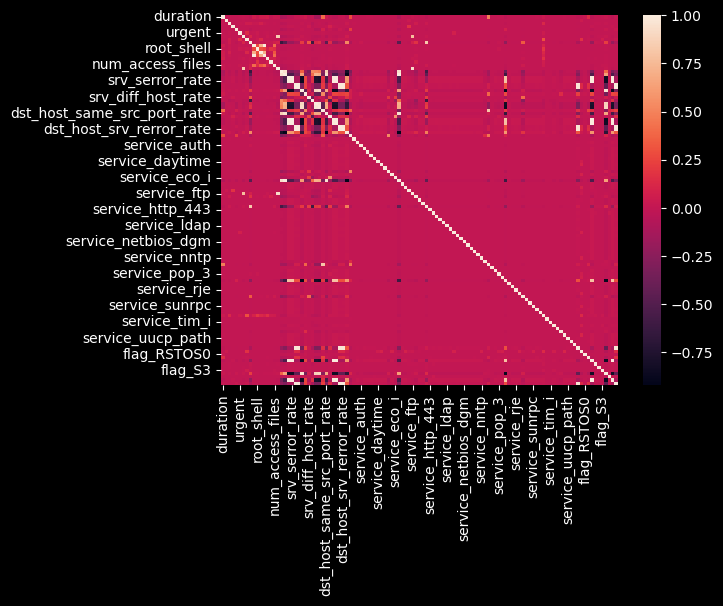

In [47]:
sns.heatmap(X.corr());

In [43]:
X.head(0)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,Syn Error,Rej Error


In [50]:
# Create a dictionary where every feature that has corr > .7 is a key and the amount of corrs is the value
# Create the corr matrix
corr_mat = abs(X.corr()) > .7   # type: ignore
corr_dict = dict(corr_mat.sum().sort_values(ascending = False)) 
print(corr_dict)

{'dst_host_srv_count': 13, 'dst_host_same_srv_rate': 11, 'dst_host_srv_serror_rate': 11, 'srv_serror_rate': 11, 'flag_S0': 11, 'same_srv_rate': 11, 'dst_host_serror_rate': 11, 'serror_rate': 11, 'flag_SF': 11, 'service_private': 11, 'Syn Error': 11, 'dst_host_rerror_rate': 6, 'srv_count': 6, 'service_ecr_i': 6, 'flag_REJ': 6, 'srv_rerror_rate': 6, 'rerror_rate': 6, 'Rej Error': 6, 'dst_host_srv_rerror_rate': 6, 'count': 5, 'protocol_type_tcp': 5, 'dst_host_same_src_port_rate': 5, 'num_compromised': 3, 'is_guest_login': 3, 'service_ftp': 3, 'hot': 3, 'su_attempted': 2, 'dst_host_diff_srv_rate': 2, 'service_other': 2, 'logged_in': 2, 'num_root': 2, 'service_http': 2, 'service_nntp': 1, 'service_red_i': 1, 'flag_S3': 1, 'service_shell': 1, 'service_rje': 1, 'service_netbios_ssn': 1, 'service_remote_job': 1, 'service_netstat': 1, 'service_pop_3': 1, 'flag_SH': 1, 'service_printer': 1, 'service_ntp_u': 1, 'service_pop_2': 1, 'service_sql_net': 1, 'service_pm_dump': 1, 'service_nnsp': 1, 'se

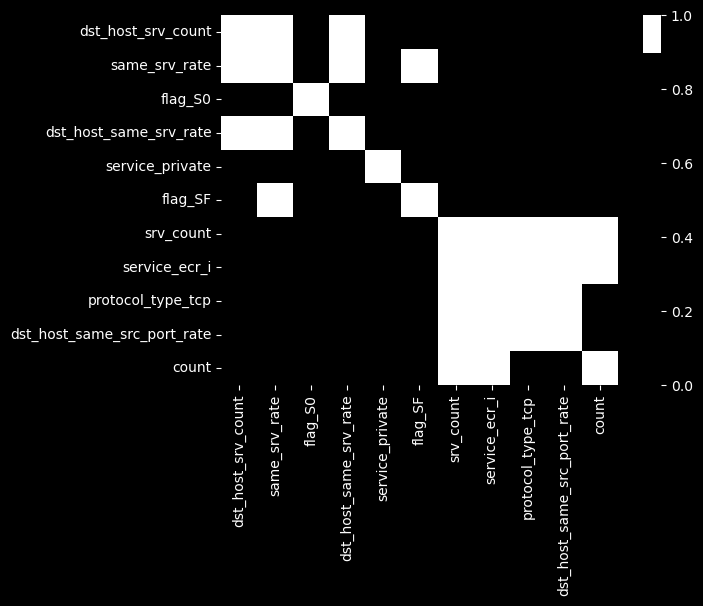

In [36]:
X_left = X[['dst_host_srv_count',
 'same_srv_rate',
 'flag_S0',
 'dst_host_same_srv_rate',
 'service_private',
 'flag_SF',
 'srv_count',
 'service_ecr_i',
 'protocol_type_tcp',
 'dst_host_same_src_port_rate',
 'count']]
cmap = ListedColormap(['black', 'white']) #type: ignore
sns.heatmap(abs(X_left.corr()), cmap = cmap, center = 0.9, vmin = 0.0, vmax = 1);


In [111]:
# Create a dictionary where every feature that has corr > .7 is a key and the amount of corrs is the value
# Create the corr matrix
corr_mat = abs(df.corr()) > .4   # type: ignore
corr_dict2 = dict(corr_mat.sum().sort_values(ascending = False)) 
corr_dict2 = {key: value - 1 for key, value in corr_dict2.items() if value != 1}
print(corr_dict2)

{'dst_host_count': 3, 'dst_host_srv_diff_host_rate': 2, 'dst_host_diff_srv_rate': 2, 'logged_in': 2, 'count': 2, 'duration': 1, 'num_access_files': 1, 'service_eco_i': 1, 'service_smtp': 1, 'protocol_type_udp': 1, 'srv_diff_host_rate': 1, 'service_domain_u': 1, 'diff_srv_rate': 1, 'num_compromised': 1}


In [109]:
correlations2 = {}
still_high_mcl = list(corr_dict2.keys())
still_corr = pd.DataFrame(df[still_high_mcl].corr())
for shm in still_high_mcl:
    corrs2 = still_corr.index[abs(still_corr[shm]) > .4].tolist()
    corrs2.remove(shm)
    correlations2.update({shm: corrs2})
print(correlations2)

{'dst_host_count': ['dst_host_srv_diff_host_rate', 'logged_in', 'count'], 'dst_host_srv_diff_host_rate': ['dst_host_count', 'service_eco_i'], 'dst_host_diff_srv_rate': ['duration', 'diff_srv_rate'], 'logged_in': ['dst_host_count', 'count'], 'count': ['dst_host_count', 'logged_in'], 'duration': ['dst_host_diff_srv_rate'], 'num_access_files': ['num_compromised'], 'service_eco_i': ['dst_host_srv_diff_host_rate'], 'service_smtp': ['srv_diff_host_rate'], 'protocol_type_udp': ['service_domain_u'], 'srv_diff_host_rate': ['service_smtp'], 'service_domain_u': ['protocol_type_udp'], 'diff_srv_rate': ['dst_host_diff_srv_rate'], 'num_compromised': ['num_access_files']}


In [158]:
# Define the Syn Error columns
serror = ['serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']
# Create new Syn Error column as mean of the former Syn Error columns
x_num_data_scaled['Syn Error'] = x_num_data_scaled[serror].max(axis = 1)

# Define the Syn Error columns
rerror = ['rerror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
# Create new Syn Error column as mean of the former Syn Error columns
x_num_data_scaled['Rej Error'] = x_num_data_scaled[rerror].max(axis = 1)

# Drop the redundant columns
df = x_num_data_scaled.drop(columns = [*serror, *rerror, 'dst_host_srv_count'])

# Drop These columns that have no clear connection but are multi-colinear
df = df.drop(['srv_count','service_ecr_i', 'dst_host_same_src_port_rate'],axis = 1)

# Create the srv_rate column
srvrate = ['dst_host_same_srv_rate', 'same_srv_rate']

# Define srvrate
df['srv_rate'] = df[srvrate].max(axis = 1)

# drop the srvrate columns
df = df.drop(srvrate, axis = 1)

# Drop these features as well for MCL and they aren't as good as their colinearities
df = df.drop(['flag_S0', 'flag_REJ', 'flag_SF', 'service_private','service_ftp','num_root',
              'srv_rate', 'service_http','protocol_type_tcp', 'is_guest_login','service_other',
              'su_attempted'], axis = 1)

# The vif score was too high so I had to see if dropping it would give a better chance
df = df.drop('count', axis = 1)

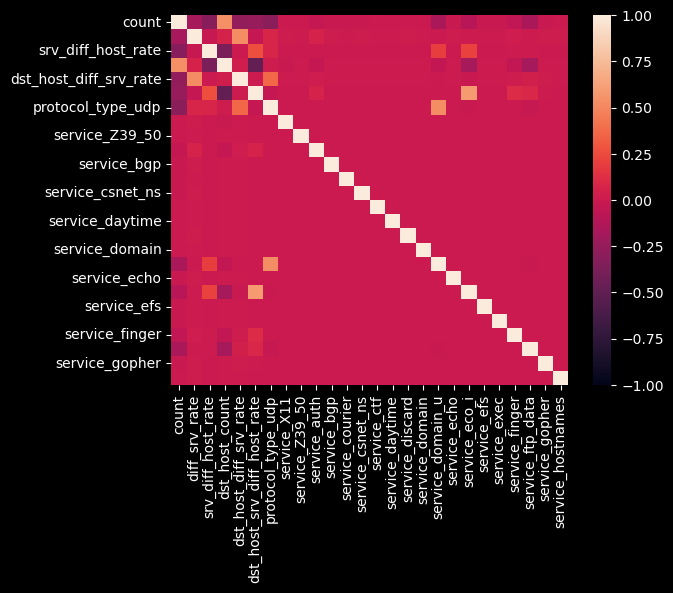

In [100]:
sns.heatmap(df[''].corr(), vmin = -1, vmax = 1);

In [159]:
#calculate the vif for the dataframe to see if it is non colinear
vif = [variance_inflation_factor(df, i) for i in range(len(df))]
# Put those numbers into a dictionary
vif_dict = {df.columns[i]:vif[i] for i in range(len(df))}

IndexError: index 89 is out of bounds for axis 1 with size 89

In [153]:
print(f"{len(vif_dict)} out of {len(df.columns)} features have a vif > 2.5")
sorted_vif_dict = {k:v for k, v in sorted(vif_dict.items(), key=lambda item: item[1])}
print(sorted_vif_dict)
print(sorted_vif_dict.keys())

5 out of 90 features have a vif > 2.5
{'Rej Error': 3.627078011257206, 'protocol_type_udp': 6.308413996677263, 'Syn Error': 6.922799952867054, 'logged_in': 11.559131136615518, 'count': 17.027657147323698}
dict_keys(['Rej Error', 'protocol_type_udp', 'Syn Error', 'logged_in', 'count'])


In [157]:
sorted([df['count'].corr(df[col]) for col in df.columns])[0]

-0.6346407395092063

In [150]:
type(cm)

pandas.core.frame.DataFrame

This result is a major problem. While it may have seemed as though there were a lot of features to work with, instead most of the features are multicolinear and will need to be dropped. The first step is to see how many of the multicolinear variables are from dummy columns vs. the initial features.

In [ ]:
# Create Lasso model
lasso = Lasso(max_iter = 50000)

# Define hyperparameter grid with a value less than 00.5 since that was the be
params = {'alpha': np.linspace(.001, .01, 20)}

# Perform grid search
grid_search = GridSearchCV(estimator=lasso, param_grid=params, cv=8)
grid_search.fit(df, y)

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)


In [93]:
# Find the coefficients of lasso regularization
lasso = Lasso(alpha = .005)
lasso.fit(df,y)
lasso_dict = {df.columns[i]:lasso.coef_[i] for i in range(len(df.columns)) if list(lasso.coef_)[i] != 0}
lasso_features = [df.columns[i] for i in range(len(df.columns)) if list(lasso.coef_)[i] != 0]
print(lasso_dict)
print(len(lasso_dict))

{'wrong_fragment': 0.035594207190675416, 'hot': 0.023499622699744576, 'logged_in': -0.1747365130821361, 'root_shell': 0.00040519642670957054, 'count': 0.15492594059310605, 'srv_diff_host_rate': -0.0011476352874432176, 'dst_host_count': 0.051633492094175795, 'protocol_type_udp': -0.1152902574849489, 'service_eco_i': 0.013075251117727359, 'service_finger': -0.007552676772391382, 'service_urp_i': -0.015542627806727074, 'flag_RSTR': 0.008683654941485961, 'Syn Error': 0.08439660471281248, 'Rej Error': 0.01914488705930947}
14


<AxesSubplot:>

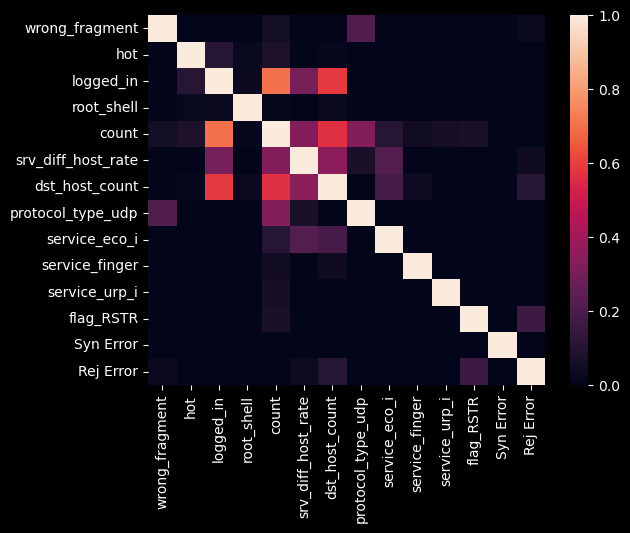

In [121]:
sns.heatmap(abs(df[list(lasso_dict.keys())]).corr(), vmin = 0, vmax = 1)

In [122]:
lasso_df_features = df[list(lasso_dict.keys())]

Now that we have a dataframe that is not supposed to have a colinearity problem we can test this one more time with the variance inflation score.

In [123]:
# Create a list vif that stores all of the vif values for each of the features
vif2 = [variance_inflation_factor(lasso_df_features, i) for i in range(len(lasso_df_features.columns))]
# Bind the features to their vif value for analysis, only keep the features with vif>2
vif2_dict = {lasso_df_features.columns[i]:[vif2[i], v]  for i,v in enumerate(lasso_dict.values())}
print(vif2_dict)
len(vif2_dict)

{'wrong_fragment': [1.0551955249124254, 0.035594207190675416], 'hot': [1.0156957160086304, 0.023499622699744576], 'logged_in': [10.340114878441996, -0.1747365130821361], 'root_shell': [1.0014275914512543, 0.00040519642670957054], 'count': [15.18280060260962, 0.15492594059310605], 'srv_diff_host_rate': [1.2537347167568267, -0.0011476352874432176], 'dst_host_count': [2.0373429535331042, 0.051633492094175795], 'protocol_type_udp': [4.14409424330895, -0.1152902574849489], 'service_eco_i': [1.3112403219265765, 0.013075251117727359], 'service_finger': [1.055185524710922, -0.007552676772391382], 'service_urp_i': [1.0897038050561159, -0.015542627806727074], 'flag_RSTR': [1.038215797940227, 0.008683654941485961], 'Syn Error': [5.72900026746973, 0.08439660471281248], 'Rej Error': [2.9293227026054787, 0.01914488705930947]}


14

<AxesSubplot:>

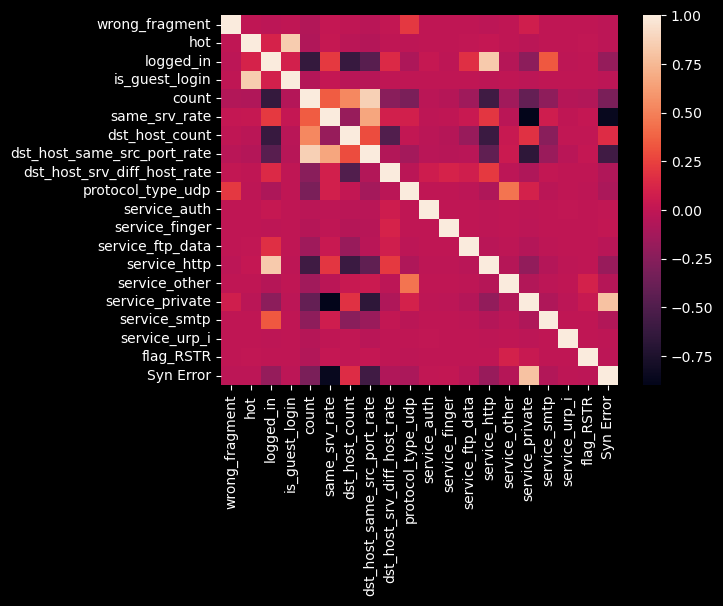

In [73]:
sns.heatmap(lasso_df_features.corr())

In [28]:
# Drop certain features because of the clear correlation in the heatmap
data['srv_serror_rate'].unique()



array([0.  , 0.25, 0.11, 0.03, 0.17, 0.06, 0.04, 0.1 , 0.05, 0.02, 0.07,
       0.09, 0.5 , 0.08, 0.12, 0.33, 0.2 , 0.14, 1.  , 0.27, 0.67, 0.75,
       0.93, 0.92, 0.88, 0.94, 0.36, 0.95, 0.58, 0.76, 0.15, 0.22, 0.18,
       0.4 , 0.01, 0.16, 0.19, 0.38, 0.37, 0.91, 0.35, 0.45, 0.83, 0.21,
       0.44, 0.23, 0.51, 0.86, 0.9 , 0.8 , 0.85])